# Tarefa - Álgebra Linear

A célula abaixo gera dados de notas de duas provas, p1 e p2, conforme em aula, mas com mais alunos.

## 1. Reduzindo correlações

a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

b) Calcule a correlação entre os dados da **p1** e **p2**

c) Calcule a correlação entre os dados transformados (média e diferença)

d) Comente as correlações observadas.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})

In [5]:
# Calculando média e evolução
df['média'] = df.mean(axis=1)
df['somatório_notas'] = df.p1 + df.p2
df['evolução'] = df.p2-df.p1
df.style.format(precision=1, decimal=',') #explorar as propriedades do style. (permite colocar virgula como separdor, modelo brasileiro de decimal.)

,p1,p2,média,evolução,somatório_notas
0,"7,0","7,9","7,1","1,0","14,9"
1,"2,9","5,1","3,9","2,2","8,0"
2,"2,3","1,0","1,5","-1,3","3,2"
3,"5,5","4,5","4,7","-1,0","10,0"
4,"7,2","8,9","7,8","1,7","16,1"
5,"4,2","3,4","3,6","-0,8","7,7"
6,"9,8","9,8","9,3","0,0","19,6"
7,"6,8","7,9","7,1","1,1","14,8"
8,"4,8","5,7","5,0","0,9","10,5"
9,"3,9","5,7","4,6","1,8","9,6"


In [8]:
correlation = df['p1'].corr(df['p2'])
correlation

0.8957365818728042

In [9]:
correlation_2 = df['média'].corr(df['evolução'])
correlation_2

0.15778744933091443

Text(0, 0.5, 'Notas_P2')

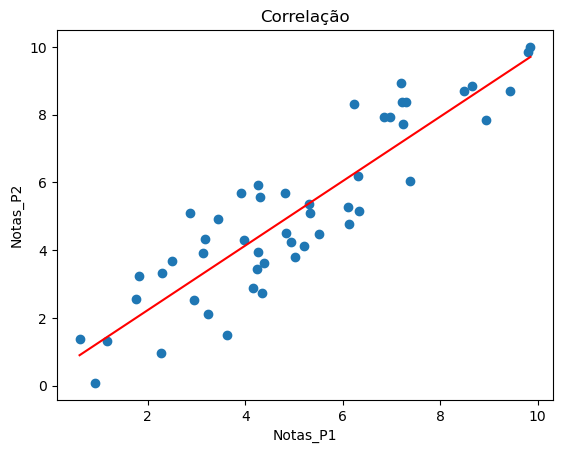

In [19]:
plt.title('Correlação') 
plt.scatter(df['p1'], df['p2']) 
plt.plot(np.unique(df['p1']),  
         np.poly1d(np.polyfit(df['p1'], df['p2'], 1)) 
         (np.unique(df['p1'])), color='red') 
plt.xlabel('Notas_P1') 
plt.ylabel('Notas_P2')

In [10]:
def translin_v2(m):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1,1,1)

    xmin = -2
    xmax = df.p1.max()*1.1
    ymin = -2
    ymax = df.p2.max()*1.1

    ax.axis('equal')
    ax.set_aspect('equal', 'box')
    ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

    lista_xticks = list(range(int(xmin), int(xmax)+1))
    ticksx = ax.set_xticks(lista_xticks)
    labelsx = ax.set_xticklabels(lista_xticks, fontsize='large')

    lista_yticks = list(range(int(ymin), int(ymax)+1))
    ticksy = ax.set_yticks(lista_yticks)
    labelsy = ax.set_yticklabels(lista_yticks, fontsize='large')

    ax.axvline(0, linewidth=.5, linestyle='--')
    ax.axhline(0, linewidth=.5, linestyle='--')

    ax.arrow(0, 0, m[0,0], m[0,1]
             , head_width=0.25
             , head_length=0.1
             , fc='g', ec='g', 
             length_includes_head=True)

    ax.arrow(0, 0, m[1,0], m[1,1]
             , head_width=0.25
             , head_length=0.1
             , fc='r', ec='r', 
             length_includes_head=True)

    plt.scatter(x = df.p1, y=df.p2, label = 'originais')
    plt.scatter(x = df['média'], y=df['evolução'], label = 'transformados')

    ax.legend(loc='upper left')

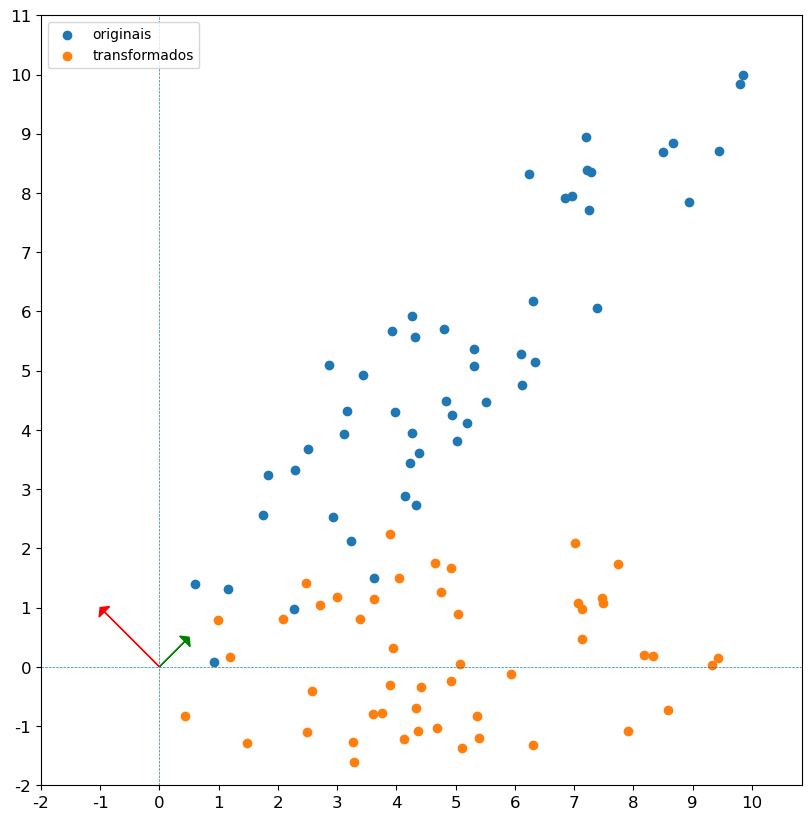

In [11]:
t = np.array([[ .5, .5],
              [ -1, 1]])
translin_v2(t)

Text(0, 0.5, 'Evolução')

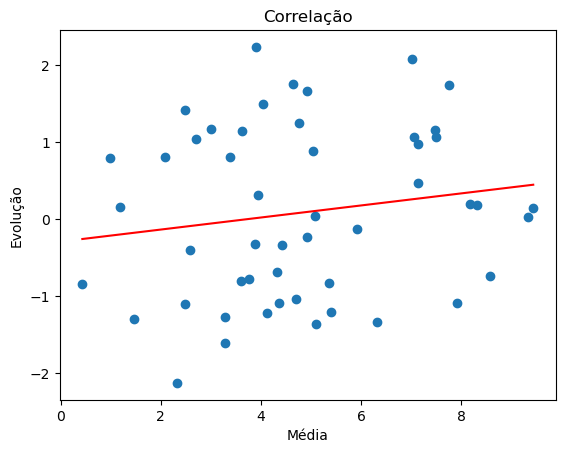

In [18]:
plt.title('Correlação') 
plt.scatter(df['média'], df['evolução']) 
plt.plot(np.unique(df['média']),  
         np.poly1d(np.polyfit(df['média'], df['evolução'], 1)) 
         (np.unique(df['média'])), color='red') 
plt.xlabel('Média') 
plt.ylabel('Evolução')

## PELA DISPERSÃO APRESENTADA NA CONSTRUÇÃO GRÁFICA, PERCEBE-SE BEM QUE A CORRELAÇÃO ENTRE AS NOTAS P1 E P2 É BEM MAIS ELEVADA DO QUE A CORRELAÇÃO ENTRE A MÉDIA E A EVOLUÇÃO. O SEGUNDO GRÁFICO É BEM MAIS DISPERSO DO QUE O PRIMEIRO, PERMITINDO ESSA PERCEPÇÃO.

## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.

In [30]:
correlation_2 = df['evolução'].corr(df['somatório_notas'])
correlation_2

0.1334738541178884

Text(0, 0.5, 'Evolução')

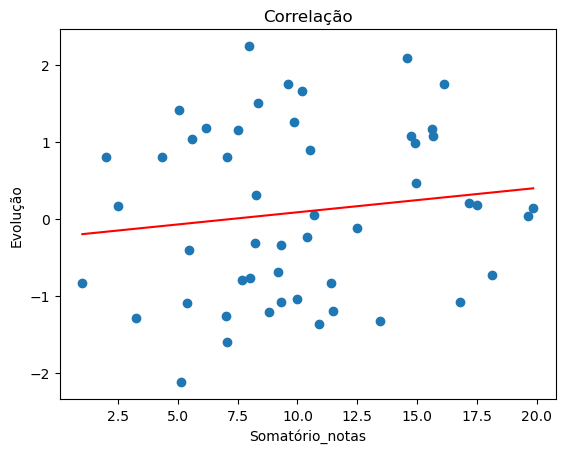

In [21]:
plt.title('Correlação') 
plt.scatter(df['somatório_notas'], df['evolução']) 
plt.plot(np.unique(df['somatório_notas']),  
         np.poly1d(np.polyfit(df['somatório_notas'], df['evolução'], 1)) 
         (np.unique(df['somatório_notas'])), color='red') 
plt.xlabel('Somatório_notas') 
plt.ylabel('Evolução')

In [28]:
def translin_v2(m):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1,1,1)

    xmin = -2
    xmax = df.p1.max()*2.2
    ymin = -2
    ymax = df.p2.max()*1.1

    ax.axis('equal')
    ax.set_aspect('equal', 'box')
    ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

    lista_xticks = list(range(int(xmin), int(xmax)+1))
    ticksx = ax.set_xticks(lista_xticks)
    labelsx = ax.set_xticklabels(lista_xticks, fontsize='large')

    lista_yticks = list(range(int(ymin), int(ymax)+1))
    ticksy = ax.set_yticks(lista_yticks)
    labelsy = ax.set_yticklabels(lista_yticks, fontsize='large')

    ax.axvline(0, linewidth=.5, linestyle='--')
    ax.axhline(0, linewidth=.5, linestyle='--')

    ax.arrow(0, 0, m[0,0], m[0,1]
             , head_width=0.25
             , head_length=0.1
             , fc='g', ec='g', 
             length_includes_head=True)

    ax.arrow(0, 0, m[1,0], m[1,1]
             , head_width=0.25
             , head_length=0.1
             , fc='r', ec='r', 
             length_includes_head=True)

    plt.scatter(x = df.p1, y=df.p2, label = 'originais')
    plt.scatter(x = df['somatório_notas'], y=df['evolução'], label = 'transformados')

    ax.legend(loc='upper left')

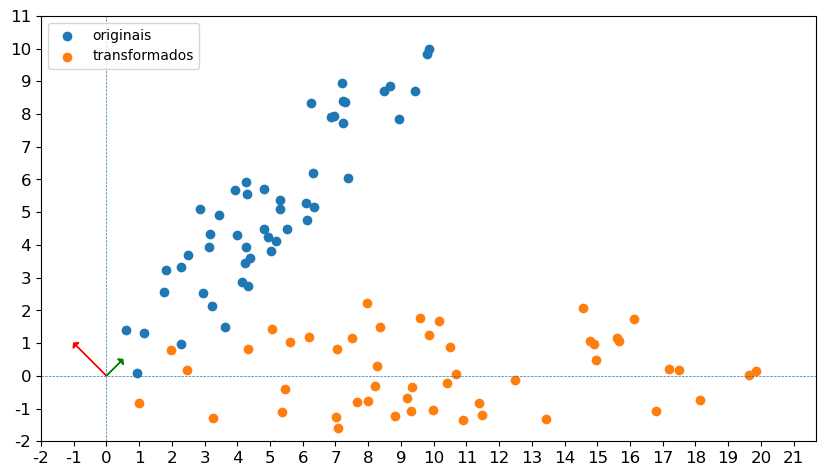

In [29]:
t = np.array([[ .5, .5],
              [ -1, 1]])
translin_v2(t)

## O CÁLCULO DA CORRELAÇÃO, APESAR DE BAIXO ( CERCA DE 13,35% ), A DISPERSÃO GRÁFICA NÃO PARECE MUITO ELEVADA.